<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Moderna/blob/main/Interferencia_Duas_Fendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import HTMLWriter, FFMpegWriter

In [2]:
# cm
D = 150.
# d = 0.010
d_init = 0.0500
d_end  = 0.0100
lambda_red = 632.8 * 1e-07
y_min = -5.
y_max =  5.
draw_slits = True
save_figures = False
save_animation = False
save_html5 = True
save_js = True
save_mpeg = True

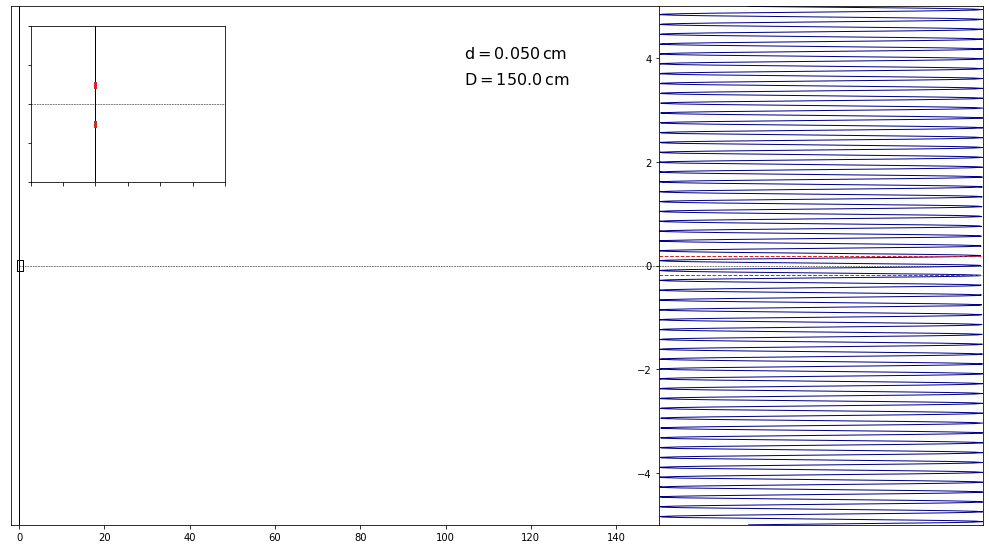

In [3]:
fig = plt.figure( figsize=(1.5*10,8) )
# fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=None, hspace=None)
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax_ = plt.gca()
divider_ = make_axes_locatable( ax_ )
sub_ax_ = divider_.append_axes( "right", size="50%", pad=0. )
ax_.set_xlim( -2., D )
ax_.set_ylim( y_min, y_max )
# ax_.set_xticks( [] )
ax_.set_yticks( [] )
sub_ax_.set_xlim( 0., 1. )
sub_ax_.set_ylim( y_min, y_max )
sub_ax_.set_xticks( [] )
# sub_ax_.set_yticks( [] )

d_ = d_init

ax_.plot( [0.,D], [0.,0.], 'k', linestyle='dashed', linewidth=0.5 )
ax_.plot( [0.,0.], [y_min,y_max], 'k', linestyle='solid', linewidth=1. )
# ax_.scatter( [0.,0.], [-d_/2,d_/2], s=5., color='tab:red' )
width__ = 0.0050
ax_.plot( [0.,0.], [(-d_/2 - width__/2),(-d_/2 + width__/2)], color='tab:red', linewidth=3. )
ax_.plot( [0.,0.], [(d_/2 - width__/2),(d_/2 + width__/2)], color='tab:red', linewidth=3. )
sub_ax_.plot( [0.,1.], [0.,0.], 'k', linestyle='dashed', linewidth=0.5 )

line_slit_0 = None
line_slit_1 = None
if draw_slits:
    ax_.plot( [-0.5,1.,1.,-0.5,-0.5], [-0.1,-0.1,0.1,0.1,-0.1], 'k-', linewidth=1. )
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    ax_inset_ = inset_axes(ax_, width="30%", height="30%", loc=2, borderpad=2)
    ax_inset_.tick_params(labelleft=False, labelbottom=False)
    ax_inset_.set_xlim( -0.5, 1. )
    ax_inset_.set_ylim( -0.1, 0.1 )
    ax_inset_.plot( [-0.5,1.], [0.,0.], 'k', linestyle='dashed', linewidth=0.5 )
    ax_inset_.plot( [0.,0.], [-0.1,0.1], 'k-', linewidth=1. )
    width__ = 0.0050
    line_slit_0, = ax_inset_.plot( [0.,0.], [(-d_/2-width__/2),(-d_/2+width__/2)], color="tab:red", linewidth=3. )
    line_slit_1, = ax_inset_.plot( [0.,0.], [(d_/2-width__/2),(d_/2+width__/2)], color="tab:red", linewidth=3. )

# y_pos_ = 1.
# l0_ = np.sqrt( ( y_pos_ - d/2 ) ** 2 + D ** 2 )
# l1_ = np.sqrt( ( y_pos_ + d/2 ) ** 2 + D ** 2 )
# phi_ = 2 * np.pi * ( l0_ - l1_ ) / lambda_red
# I_over_I0_ = ( 1. + np.cos( phi_ ) ) / 2
# print ( I_over_I0_ 

y_pos_ = np.linspace( y_min, y_max, 1000 )
l0_ = np.sqrt( ( y_pos_ - d_/2 ) ** 2 + D ** 2 )
l1_ = np.sqrt( ( y_pos_ + d_/2 ) ** 2 + D ** 2 )
phi_ = 2 * np.pi * ( l0_ - l1_ ) / lambda_red
I_over_I0_ = ( 1. + np.cos( phi_ ) ) / 2
line_plot, = sub_ax_.plot( I_over_I0_, y_pos_, color='darkblue', linestyle='solid', linewidth=1 )
y_peak_ = D * ( lambda_red / d_ ) / np.sqrt( 1. - ( lambda_red / d_ ) ** 2 )
line_max_0, = sub_ax_.plot( [0.,1.], [y_peak_,y_peak_], color='tab:red', linestyle='dashed', linewidth=1 )
line_max_1, = sub_ax_.plot( [0.,1.], [-y_peak_,-y_peak_], color='tab:red', linestyle='dashed', linewidth=1 )
text_d = ax_.text( 0.70, 0.90, r'$\rm{{d}} = {:.3f}\,\rm{{cm}}$'.format( d_ ), transform=ax_.transAxes, fontsize=16 )
text_D = ax_.text( 0.70, 0.85, r'$\rm{{D}} = {:.1f}\,\rm{{cm}}$'.format( D ), transform=ax_.transAxes, fontsize=16 )
if save_figures:
    plt.savefig( "fig_Interferencia.pdf", bbox_inches='tight' )
    plt.savefig( "fig_Interferencia.png", bbox_inches='tight' )

In [4]:
n_frames = 100
array_d = np.linspace( d_init, d_end, n_frames )

def update( frame_number ):
    
    if frame_number >= 0:
        print ( "Frame: {}".format( frame_number ) )

        idx_ = frame_number
        d_ = array_d[ idx_ ]

        y_pos_ = np.linspace( y_min, y_max, 1000 )
        l0_ = np.sqrt( ( y_pos_ - d_/2 ) ** 2 + D ** 2 )
        l1_ = np.sqrt( ( y_pos_ + d_/2 ) ** 2 + D ** 2 )
        phi_ = 2 * np.pi * ( l0_ - l1_ ) / lambda_red
        I_over_I0_ = ( 1. + np.cos( phi_ ) ) / 2
        y_peak_ = D * ( lambda_red / d_ ) / np.sqrt( 1. - ( lambda_red / d_ ) ** 2 )

        line_plot.set_data( I_over_I0_, y_pos_ )
        line_max_0.set_data( [0.,1.], [y_peak_,y_peak_] ) 
        line_max_1.set_data( [0.,1.], [-y_peak_,-y_peak_] ) 
        text_d.set_text( r'$\rm{{d}} = {:.3f}\,\rm{{cm}}$'.format( d_ ) )
        if draw_slits:
            width__ = 0.0050
            line_slit_0.set_data( [0.,0.], [(-d_/2-width__/2),(-d_/2+width__/2)] )
            line_slit_1.set_data( [0.,0.], [(d_/2-width__/2),(d_/2+width__/2)] )

        return ( line_plot, line_max_0, line_max_1, text_d, line_slit_0, line_slit_1 )

# Animation
step_ = 0.1 # s
animation = FuncAnimation( fig, update, frames=n_frames, interval=( step_ * 1000 ) )

from IPython.display import HTML
HTML(animation.to_jshtml())

Frame: 0
Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12
Frame: 13
Frame: 14
Frame: 15
Frame: 16
Frame: 17
Frame: 18
Frame: 19
Frame: 20
Frame: 21
Frame: 22
Frame: 23
Frame: 24
Frame: 25
Frame: 26
Frame: 27
Frame: 28
Frame: 29
Frame: 30
Frame: 31
Frame: 32
Frame: 33
Frame: 34
Frame: 35
Frame: 36
Frame: 37
Frame: 38
Frame: 39
Frame: 40
Frame: 41
Frame: 42
Frame: 43
Frame: 44
Frame: 45
Frame: 46
Frame: 47
Frame: 48
Frame: 49
Frame: 50
Frame: 51
Frame: 52
Frame: 53
Frame: 54
Frame: 55
Frame: 56
Frame: 57
Frame: 58
Frame: 59
Frame: 60
Frame: 61
Frame: 62
Frame: 63
Frame: 64
Frame: 65
Frame: 66
Frame: 67
Frame: 68
Frame: 69
Frame: 70
Frame: 71
Frame: 72
Frame: 73
Frame: 74
Frame: 75
Frame: 76
Frame: 77
Frame: 78
Frame: 79
Frame: 80
Frame: 81
Frame: 82
Frame: 83
Frame: 84
Frame: 85
Frame: 86
Frame: 87
Frame: 88
Frame: 89
Frame: 90
Frame: 91
Frame: 92
Frame: 93
Frame: 94
Frame: 95
Frame: 96
Frame: 97
Frame: 98
Frame: 99


In [5]:
if save_animation:
    if save_html5:
        with open( "animation_video.html", 'w' ) as f:
            print( animation.to_html5_video(), file=f )
    if save_js:
        animation.save( "animation_js.html", writer=HTMLWriter() )
    if save_mpeg:
        animation.save( "animation.mp4", writer=FFMpegWriter() )

In [6]:
if save_animation:
    from google.colab import files
    if save_html5:
        files.download( "animation_video.html" )
    if save_js:
        !zip -r animation_js.zip animation_js.html animation_js_frames
        files.download( "animation_js.zip" )
    if save_mpeg:
        files.download( "animation.mp4" )

In [7]:
import os
os.listdir()

['.config', 'sample_data']